In [1]:
# 시작에 앞서 한글 폰트설정

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인
    
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows" :
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 꼭 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
        
    return font_family

# https://www.youtube.com/watch?v=9ovF2bqMME4
# 갓튜버 "todaycode오늘코드"님의 영상 < KRX분석 [6/13] 데이터 시각화 도구 소개와 한글 폰트 설정 >

In [2]:
# 한글 폰트 설정 적용
import matplotlib.pyplot as plt

font_family = get_font_family()
plt.rc("font", family=font_family)

plt.style.use("seaborn-whitegrid")
# https://matplotlib.org/tutorials/introductory/customizing.html

In [2]:
import pandas as pd
exp_data = pd.DataFrame(columns=['single-model', 'efficientnet'])
exp_data['single-model'] = [95.1, 96.4, 97.4, 97.9, 98.5, 98.9, 99.2, None, None, None, None]
exp_data['efficientnet'] = [None, None, None, None, None, None, 97.0, 97.6, 97.9, 98.2, 98.4]
exp_data.index = ['0M', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '9M', '10M']
exp_data

,single-model,efficientnet
0M,95.1,NaN
1M,96.4,NaN
2M,97.4,NaN
3M,97.9,NaN
4M,98.5,NaN
5M,98.9,NaN
6M,99.2,97.0
7M,NaN,97.6
8M,NaN,97.9
9M,NaN,98.2


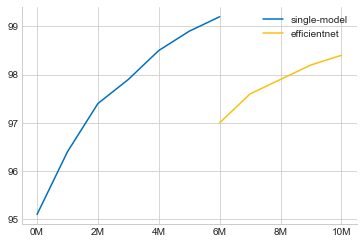

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
colors = ["#0070BD", "#FAC00F"]
sns.set_palette(sns.color_palette(colors))

exp_data.plot()
sns.despine(bottom=False, left=False)

In [3]:
train = pd.read_csv("news_train.csv")
train = train.drop(['n_id', 'ord'],axis=1)

In [4]:
train['info'].value_counts()

0    71813
1    46932
Name: info, dtype: int64

In [166]:
temp = []
for label in train['info']:
    if label == 0:
        target = '진짜뉴스'
    else:
        target = '가짜뉴스'
    temp.append(target)
train['info'] = temp
train['target'] = 10
train

,date,title,content,info,연도,월,일,target
0,2020-06-05,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,진짜뉴스,2020,6,5,10
1,2020-06-05,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",가짜뉴스,2020,6,5,10
2,2020-06-05,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",가짜뉴스,2020,6,5,10
3,2020-06-05,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,진짜뉴스,2020,6,5,10
4,2020-06-26,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,진짜뉴스,2020,6,26,10
...,...,...,...,...,...,...,...,...
118740,2020-01-17,"모나리자, 중원 지분 16.88% 양수 결정",미 FDA 임상3상 허가 임박. 묻고 따블로 갈 바이오 황제주.,가짜뉴스,2020,1,17,10
118741,2020-01-17,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,가짜뉴스,2020,1,17,10
118742,2020-01-17,"모나리자, 중원 지분 16.88% 양수 결정",똑똑해진 소비자..한국도 이젠 소형차 시대,가짜뉴스,2020,1,17,10
118743,2020-01-17,"모나리자, 중원 지분 16.88% 양수 결정",2020년 한국 TV 2대중 1대 인터넷 연결된다,가짜뉴스,2020,1,17,10


In [172]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        # review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [173]:
import re
train.content = clean_text(train.content)
train.title = clean_text(train.title)

In [174]:
temp = []
for n in range(len(train)):
    a = len(train['content'][n])
    temp.append(a)
train['content_len'] = temp

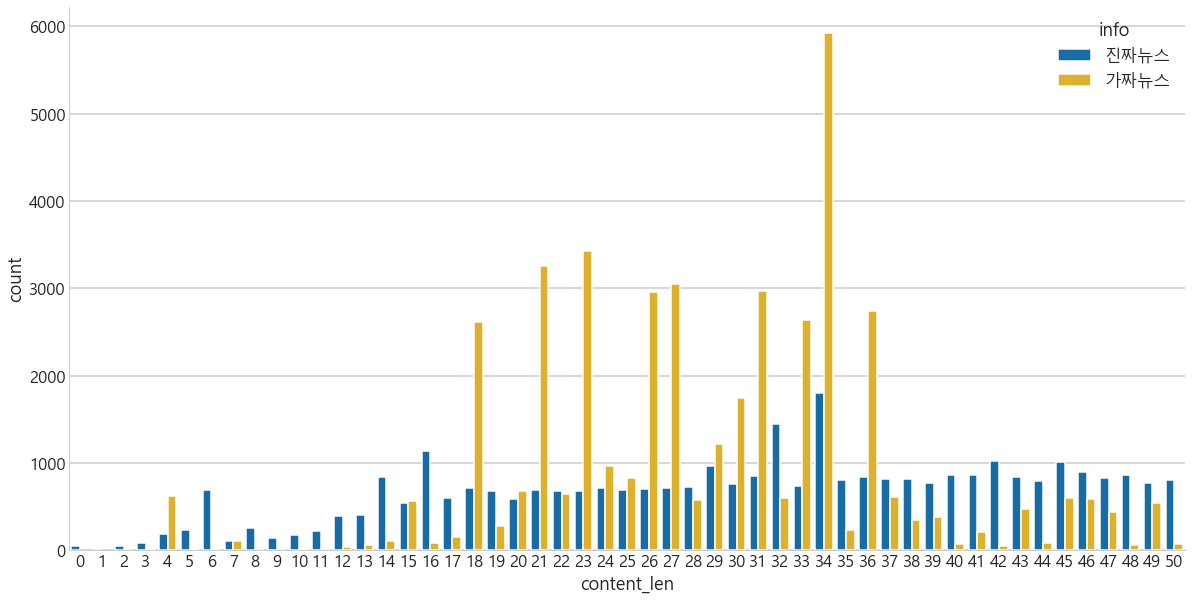

In [180]:
colors = ["#0070BD", "#FAC00F"]
sns.set_palette(sns.color_palette(colors))
plt.rc("font", family=font_family)

temp = train[train['content_len'] < 51]
plt.figure(figsize=(20, 10))
sns.countplot(data=temp, x='content_len', hue='info')

sns.despine(bottom=False, left=False)

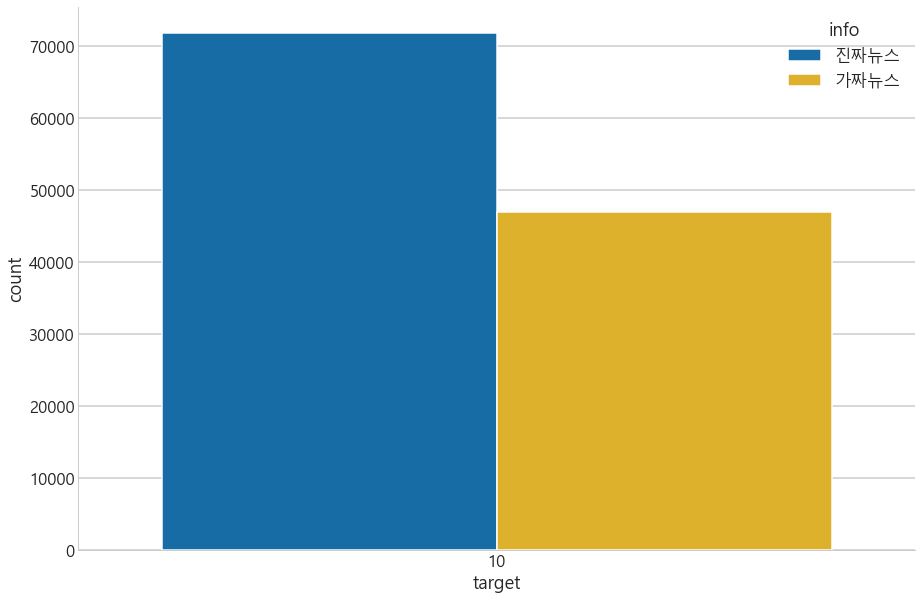

In [184]:
colors = ["#0070BD", "#FAC00F"]
sns.set_palette(sns.color_palette(colors))
plt.rc("font", family=font_family)
plt.figure(figsize=(15, 10))
sns.countplot(data=train,x='target', hue='info')
sns.despine(bottom=False, left=False)

In [151]:
train['date'] = pd.to_datetime(train['date'], format='%Y%m%d')
train['연도'] = train['date'].dt.year
train['월'] = train['date'].dt.month
train['일'] = train['date'].dt.day

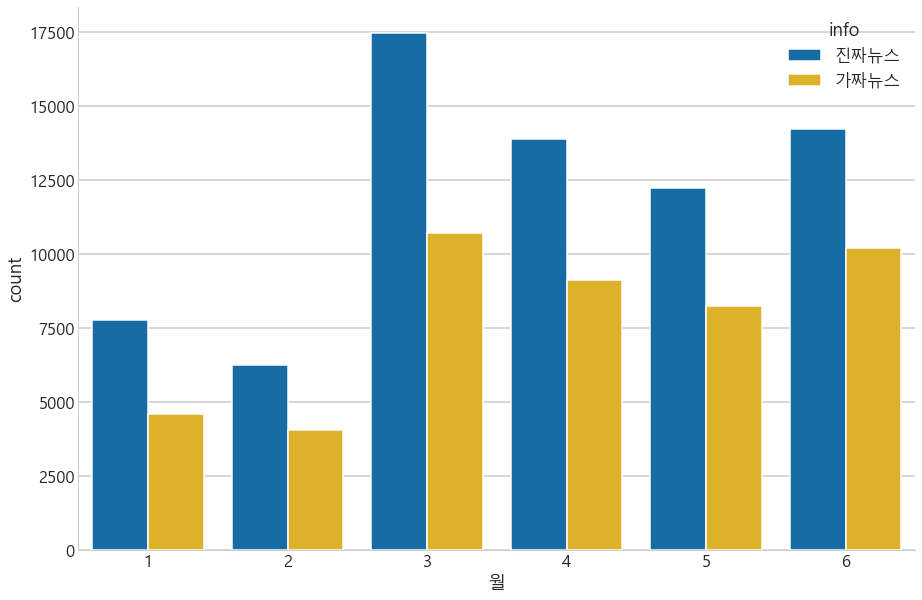

In [183]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train[['월', 'info']], x='월', hue='info')
sns.despine(bottom=False, left=False)

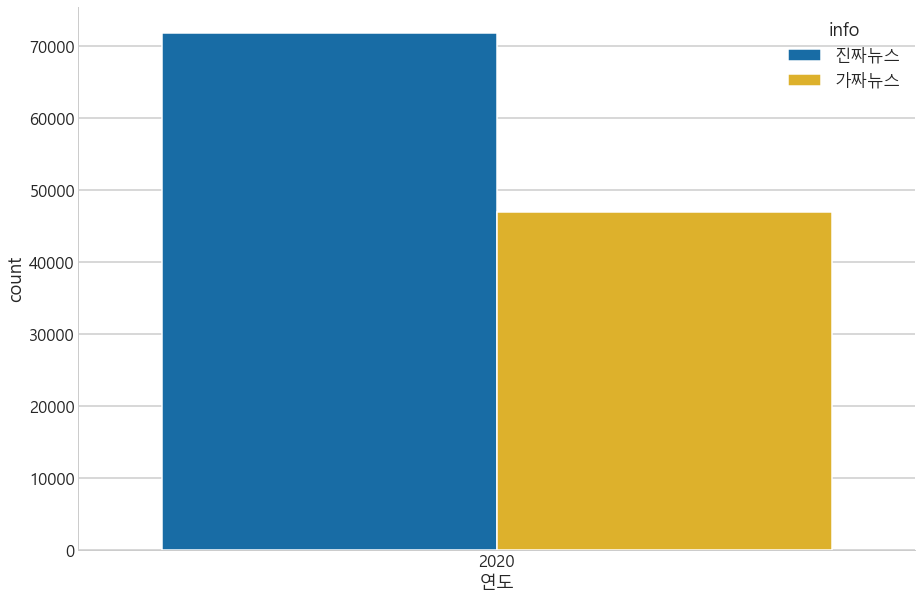

In [185]:
plt.figure(figsize=(15, 10))
sns.countplot(data=train[['연도', 'info']], x='연도', hue='info')
sns.despine(bottom=False, left=False)

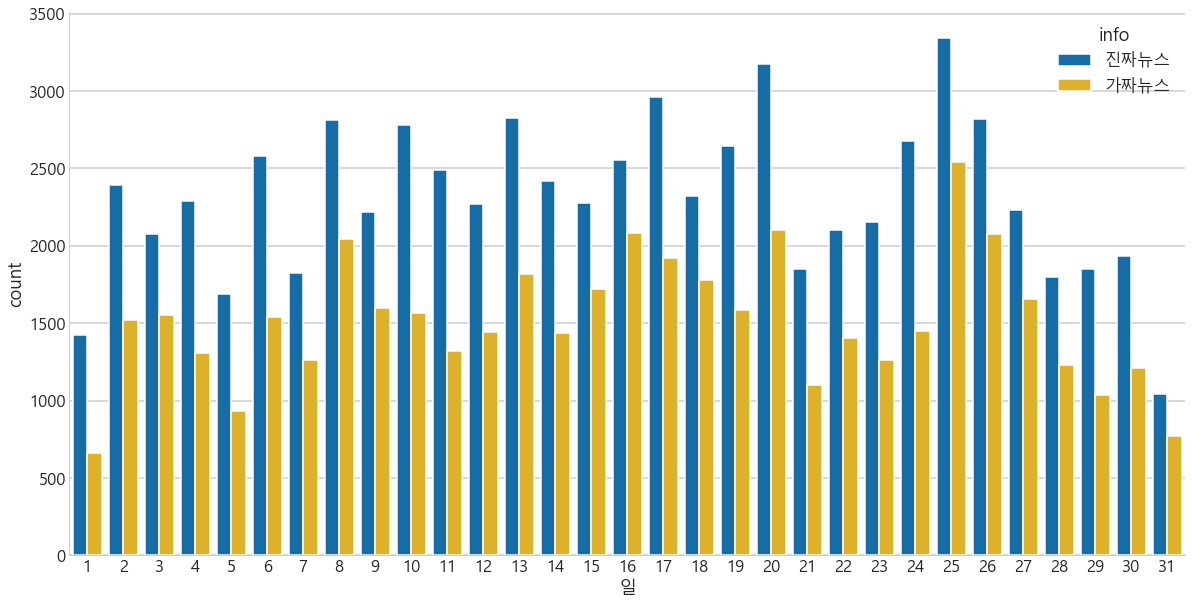

In [186]:
plt.figure(figsize=(20, 10))
sns.countplot(data=train[['일', 'info']], x='일', hue='info')
sns.despine(bottom=False, left=False)